In [29]:
!pip install dlib
!pip install astropy 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 88.6 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 742.9/742.9 kB 69.2 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib.request
from tqdm import tqdm
import requests
import shutil
import dlib

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('players_22.csv')
df.head()

/tmp/ipykernel_1613/1327346208.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
# Lionel Messi
df.iloc[0]
#player_url includes image faces

sofifa_id                                                      158023
player_url          https://sofifa.com/player/158023/lionel-messi/...
short_name                                                   L. Messi
long_name                              Lionel Andrés Messi Cuccittini
player_positions                                           RW, ST, CF
                                          ...                        
player_face_url     https://cdn.sofifa.net/players/158/023/22_120.png
club_logo_url                  https://cdn.sofifa.net/teams/73/60.png
club_flag_url                     https://cdn.sofifa.net/flags/fr.png
nation_logo_url              https://cdn.sofifa.net/teams/1369/60.png
nation_flag_url                   https://cdn.sofifa.net/flags/ar.png
Name: 0, Length: 110, dtype: object

In [4]:
print("weekly_salary: ", df.iloc[0]['wage_eur']) # Weekly_salary
print("Overall: ", df.iloc[0]['overall']) # player current overall attribute

weekly_salary:  320000.0
Overall:  93


# Download images from the player_url_face

In [15]:
os.makedirs('imgs', exist_ok=True)

for i, row in tqdm(df.iterrows()):
    img_url = row['player_face_url']
    overall = row['overall']

    r = requests.get(img_url, stream=True, headers={'User-agent': 'Mozilla/5.0'})

    if r.status_code == 200:
        with open('imgs/%s_%s.png' % (i, overall), 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)
    else:
        print(row['short_name'])

19239it [45:37,  7.03it/s]


# Download ArcFace Face Recognition Package

In [21]:
!pip install -q arcface

# Face Recognition

In [5]:
from glob import glob
img_list = glob('imgs/*.png')
img_list[:5]

['imgs/0_93.png',
 'imgs/1_92.png',
 'imgs/2_91.png',
 'imgs/3_91.png',
 'imgs/4_91.png']

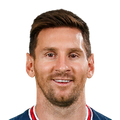

In [6]:
from PIL import Image
Image.open(img_list[0])

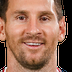

In [7]:
detector = dlib.get_frontal_face_detector()
img = Image.open(img_list[0]).convert('RGB')
dets = detector(np.array(img))
det = dets[0]

x1 = det.left()
y1 = det.top()
x2 = det.right()
y2 = det.bottom()

crop_img = img.crop((x1, y1, x2, y2))
crop_img.save('temp_crop.jpg')

crop_img

In [8]:
from arcface import ArcFace

face_rec = ArcFace.ArcFace()

emb = face_rec.calc_emb('temp_crop.jpg')

emb.shape

2022-09-14 18:08:15.104884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-14 18:08:15.339050: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-14 18:08:15.339075: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-14 18:08:15.365540: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-14 18:08:16.772181: W tensorflow/stream_executor/pla

(512,)

In [9]:
emb

array([ 8.17985274e-03,  5.26579581e-02, -1.63791664e-02,  2.72771493e-02,
       -9.41570383e-03, -2.96307113e-02, -2.18250160e-03, -4.96064685e-02,
       -6.65359646e-02,  4.44592275e-02,  1.74693912e-02, -3.20289284e-02,
       -2.46205628e-02,  3.09086982e-02, -3.96010280e-02, -7.03101456e-02,
        9.25098732e-03,  1.13457749e-02,  3.50043885e-02,  8.79960805e-02,
       -5.76609783e-02,  4.47075032e-02,  1.88420881e-02,  4.42802906e-02,
       -1.22972522e-02, -1.11668982e-01,  3.37831229e-02,  3.52989547e-02,
        4.77246307e-02,  1.31487735e-02,  6.88455850e-02,  9.94007476e-03,
        4.47572246e-02, -5.76930940e-02,  4.10332493e-02,  5.80345886e-03,
       -2.80749351e-02,  1.87507719e-02, -6.86261952e-02,  1.58220492e-02,
       -3.93080078e-02,  1.22232297e-02, -4.27124947e-02, -4.22309190e-02,
        3.24350074e-02, -5.29659688e-02, -5.11041395e-02, -6.02952577e-02,
       -3.82073522e-02,  9.22806263e-02,  5.56739718e-02, -9.66121617e-04,
        2.08795089e-02,  

# Dataset

In [11]:
x_data = np.empty((len(img_list), 512), dtype=np.float32)
y_data = np.empty((len(img_list), 1), dtype=np.float32)

for i, img_path in tqdm(enumerate(img_list)):
    img = Image.open(img_path).convert('RGB')
    
    dets = detector(np.array(img))
    
    if len(dets) != 1:
        continue
    
    det = dets[0]
    x1 = det.left()
    y1 = det.top()
    x2 = det.right()
    y2 = det.bottom()
    
    crop_img = img.crop((x1, y1, x2, y2))
    crop_img.save('temp_crop.jpg')
    
    emb = face_rec.calc_emb('temp_crop.jpg')
    
    overall = int(os.path.splitext(os.path.basename(img_path))[0].split('_')[1])
    
    x_data[i] = emb
    y_data[i] = overall

print(x_data.shape)
print(y_data.shape)

19239it [13:27, 23.82it/s]

(19239, 512)
(19239, 1)


# Split Train/Validation data

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=2022)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)


(15391, 512) (15391, 1)
(3848, 512) (3848, 1)


# Define the model
* input: face emb
* output: overall

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(256, input_shape=(512,), activation="relu"),
    layers.Dense(1),
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 131,585
Trainable params: 131,585
Non-trainable params: 0
_________________________________________________________________


2022-09-14 18:22:09.348136: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/cv2/../../lib64:
2022-09-14 18:22:09.348176: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-14 18:22:09.348201: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (default): /proc/driver/nvidia/version does not exist
2022-09-14 18:22:09.348690: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
history = model.fit(
    x_train,
    y_train,
    batch_size=256,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
61/61 [==============================] - 1s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan  
Epoch 2/20
61/61 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/20
61/61 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/20
61/61 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/20
61/61 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/20
61/61 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/20
61/61 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/20
61/61 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/20
61/61 [==============================] - 0s

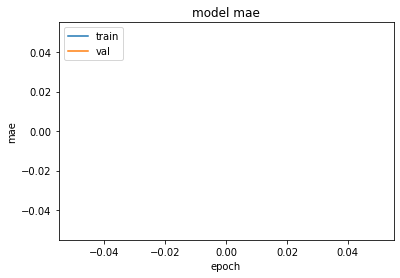

In [15]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()